### Program written by Scott Midgley, 2021

Scope: To train and test LR models for band gap energy screening in the configuraional space of MgO-ZnO solid solutions. 

In [1]:
### USER INPUT REQUIRED ###

# Please paste in the path to the repositiory here an comment/uncomment as needed.
# E.g. rundir = r'C:\Users\<user>\Desktop\repository'

# Windows path
#repodir = r'<windows\path\here>'
#repodir = r'C:\Users\smidg\Desktop\ml\repository'

#Unix path
#repodir = '<unix/path/here>'
repodir = r'/home/mts87985/ml-thermo/Machine-Learning-for-Solid-Solutions/'

In [2]:
### USER INPUT REQUIRED ###

# Define percentage of training data to use for training. 
split = 10
#split = 50
#split = 80
#split = 30

In [3]:
# Import modules. 
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pickle
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import os
from sklearn.linear_model import Lasso

## Load the data

Note we do not shuffle in this case. The data was shuffled when created and we are keeping it un-shuffled here so that the order is the same as that used in the paper. However, you are free to add a shuffle if you like.

In [4]:
# Import data and shuffle (optional).
eners = pd.read_pickle(repodir + 'repository-data/coulomb_matrix/input_data_cme.pkl')
eners = eners.sample(frac=1)
# Split data frame into training, validation, and testing data. 
if split == int(10):
    e_train = eners.iloc[1608:2412] #10% of data for training
elif split == int(30):
    e_train = eners.iloc[1608:4021] #30% of data for training
elif split == int(50):
    e_train = eners.iloc[1608:5630] #50% of data for training
elif split == int(80):
    e_train = eners.iloc[1608:] #80% of data for training
else:
    print('Error: please choose a valid train/test split.')
e_val = eners.iloc[804:1608] #10% of data for validation
e_test = eners.iloc[:804] #10% of data for testing model

In [5]:
# Convert Pandas columns to Numpy arrays. Reshaping to obtain array of nested brackets. 
Xtrain = e_train['Coulomb'].to_numpy()
ytrain = e_train['BGE'].to_numpy()
Xtrain = np.stack(Xtrain)
ytrain= np.stack(ytrain) 
Xval = e_val['Coulomb'].to_numpy()
yval = e_val['BGE'].to_numpy()
Xval = np.stack(Xval)
yval= np.stack(yval)
Xtest = e_test['Coulomb'].to_numpy()
ytest = e_test['BGE'].to_numpy()
Xtest = np.stack(Xtest)
ytest = np.stack(ytest)

In [6]:
# Define Lasso regularizer and train regressor.
lasso_reg = Lasso(alpha=0.0000001)
lasso_reg.fit(Xtrain, ytrain)

/home/mts87985/anaconda3/envs/ml-solid-solns/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44371406809018715, tolerance: 0.001598997209014726
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-07)

In [7]:
# Print parameters.
r_sq = (lasso_reg.score(Xtrain, ytrain))
inter = ('intercept: ', lasso_reg.intercept_)
coef = ('coefficient:  ', lasso_reg.coef_)
print(r_sq)
print(inter)
print(coef)

0.944660713841141
('intercept: ', -362.02234795507087)
('coefficient:  ', array([-3.24740722e-04,  9.19193140e-04,  4.17627605e-04, -1.10721614e-04,
       -1.68912337e-04, -3.73912066e-04, -6.57752061e-04, -3.72062414e-04,
        1.06763836e-04,  5.51771068e-03,  9.20861662e-03,  9.10358110e-03,
        1.01428283e-02,  8.83088448e-03,  6.57704883e-03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.10785719e-02,
       -1.63939608e-02, -1.79481727e-02, -2.38076922e-02, -4.03571225e-02,
       -1.24443264e-02, -6.29594833e-03, -2.13598803e-03,  2.39409833e-03,
        9.81359489e-04,  4.16548178e-03,  4.72566411e-03,  3.08422743e-03,
        2.20548020e-02, -5.05392094e-02, -3.12862380e-02, -5.69456470e-03,
       -1.20630677e-02,  1.21384301e-02, -7.10106702e-02,  5.34438855e-01,
        5.36246426e-01,  2.50928932e+00,  0.00000000e+00,  1.03151165e-01,
        2.34361668e-01,  2.74108886e-01,  3.12311422e-01,  4.31364538e-01,
        3.21114068e-01,  2

In [8]:
# Test linear regressor.
ypred = lasso_reg.predict(Xtest)

In [9]:
# Print metric.
mae = (mean_absolute_error(ytest, ypred))
print('mae = ', mae)

mae =  0.028820626861030898


Text(0, 0.5, 'Regressor')

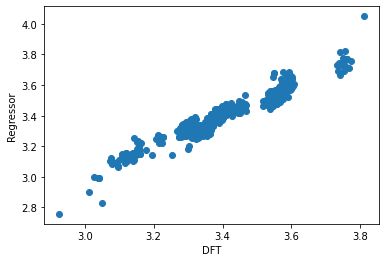

In [10]:
#Plot DFT Band gap energy vs regressor predicted.
plt.scatter(ytest, ypred)# plot the predicted versus the actual gaps
plt.xlabel('DFT')
plt.ylabel('Regressor')
#plt.savefig('BGE_pred_vs_val.png')